# Titanic Kaggle Challenge

This challenge revolves around the application of machine learning to devise a model capable of predicting the survival of passengers in the infamous Titanic shipwreck.

The Titanic disaster, which occurred on April 15, 1912, during the ship's maiden voyage, is one of the most notorious maritime catastrophes in history. Deemed "unsinkable", the RMS Titanic tragically met its fate after colliding with an iceberg. The scarcity of lifeboats led to the tragic loss of 1502 out of 2224 passengers and crew members onboard.

Despite the role of luck in survival, it is apparent that some demographic groups had higher survival rates than others.

In this challenge, my task is to create a predictive model that can answer the question, "Which types of individuals had higher chances of survival?" This task is accomplished using passenger data (such as name, age, gender, socio-economic status, etc).

The challenge is hosted on Kaggle and can be accessed via the following link: [Kaggle Titanic Challenge](https://www.kaggle.com/competitions/titanic/overview)



# Data Description

The data is divided into two categories:

- **Training set** (`train.csv`): This set, consisting of **891 rows**, is used to train machine learning models. For the training set, the outcome variable "Survived" is provided for each passenger.

- **Test set** (`test.csv`): This set contains **418 rows** and is used to evaluate the performance of the model on unseen data. The aim of the competition is to predict the survival (yes or no) of each passenger in the test set during the Titanic sinking.

## Columns

| Variable | Definition | Key |
| :--- | :--- | :--- |
| `PassengerId` | Id of the passenger | |
| `Survived` | Survival | 0 = No, 1 = Yes |
| `Pclass` | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| `Name` | Passenger's name | |
| `Sex` | Sex | |
| `Age` | Age in years | |
| `SibSp` | Number of siblings/spouses aboard the Titanic | |
| `Parch` | Number of parents/children aboard the Titanic | |
| `Ticket` | Ticket number | |
| `Fare` | Passenger fare | |
| `Cabin` | Cabin number | |
| `Embarked` | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

# First Rows of Training Set

| PassengerId | Survived | Pclass | Name                                                 | Sex    | Age  | SibSp | Parch | Ticket            | Fare    | Cabin | Embarked |
| ----------- | -------- | ------ | ---------------------------------------------------- | ------ | ---- | ----- | ----- | ----------------- | ------- | ----- | -------- |
| 1           | 0        | 3      | Braund, Mr. Owen Harris                              | male   | 22   | 1     | 0     | A/5 21171         | 7.25    |       | S        |
| 2           | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Thayer)  | female | 38   | 1     | 0     | PC 17599          | 71.2833 | C85   | C        |
| 3           | 1        | 3      | Heikkinen, Miss. Laina                               | female | 26   | 0     | 0     | STON/O2. 3101282  | 7.925   |       | S        |
| 4           | 1        | 1      | Futrelle, Mrs. Jacques Heath (Lily May Peel)         | female | 35   | 1     | 0     | 113803            | 53.1    | C123  | S        |



# Dataset Loading and Library Import

We begin by loading the training and testing datasets into pandas dataframes. Furthermore, to facilitate subsequent data manipulation, we combine these two dataframes into a single, unified dataframe.


In [71]:
# improts of all the libraries

import warnings
from datetime import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)

In [72]:
# reading all the datasets

titanic_file_path = '/Users/artg/PycharmProjects/ms-ds/intro_to_ml_1/final_project/titanic/train.csv'
titanic_df = pd.read_csv(titanic_file_path)

submission_file_path = '/Users/artg/PycharmProjects/ms-ds/intro_to_ml_1/final_project/titanic/test.csv'
submission_df = pd.read_csv(submission_file_path)

combined_df = pd.concat([titanic_df, submission_df], ignore_index=True)

combined_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Data Types for Features

Understanding the data types of our features assists us in the process of data conversion.

- **Numeric Features:** Eight of the features are either integers or floats. This reduces to seven in the case of the test dataset.

- **Categorical Features:** Seven of the features are strings (objects).

In [73]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# Distribution of Numerical Feature Values

Understanding the distribution of numerical feature values across the samples can provide us with early insights and help us gauge how representative the training dataset is of the actual problem domain.

- The total number of train samples is 891, which is about 40% of the actual number of passengers onboard the Titanic (2,224).

- `Survived` is a categorical feature with binary values 0 or 1. Approximately 38% of the samples survived, which is representative of the actual survival rate of 32%.

- Most passengers (more than 62%) did not travel with parents or children.

- About 50% of the passengers had siblings and/or a spouse aboard.

- Fares varied widely, with a small fraction of passengers (less than 1%) paying as high as $512.

- Few elderly passengers (less than 1%) fell within the age range of 65-80.


In [74]:
combined_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Data Cleaning
In this section, we will perform data cleaning and preprocessing. This includes handling missing values, encoding categorical variables, and extracting new features from the existing ones.

# Handling Missing Values

The columns `Age`, `Fare`, `Cabin`, and `Embarked` contain null values in some of the rows. Many classification models cannot process null values, hence we need to address these missing entries. There are three potential strategies to handle these missing values:

1. **Deleting the rows:** Given the relatively small size of the passengers dataset, we should avoid deleting these rows.

2. **Filling missing values with a placeholder value:** For the `Cabin` column, we will implement this approach, substituting missing values with a placeholder (Z0 value).

3. **Filling missing values with generated values:** For the `Age`, `Fare`, and `Cabin` columns, we will fill the missing entries with random values. These random values will be generated based on the mean and standard deviation values of similar rows.




In [75]:
def generate_missing_values(group, column_median):
    mean = group.mean()
    std = group.std()
    is_null = group.isnull().sum()
    if is_null > 0:
        rand_values = np.random.normal(mean, std / 2, size=is_null)
        rounded = np.round(rand_values).astype(int)
        rounded = np.clip(rounded, 0, None)  # Ensure no negative ages or fares
        group[np.isnan(group)] = rounded
    if group.isnull().all():  # If group still contains NaN values, replace with column median
        group.fillna(column_median, inplace=True)
    return group


"""
    Extract Title (Mr,Mrs, etc..) from full name that is required for filling Age with the similar rows
"""
combined_df['Title'] = combined_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
combined_df['Title'] = combined_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combined_df['Title'] = combined_df['Title'].replace('Mlle', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Ms', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Mme', 'Mrs')

"""
    Fill missing values with mean values for the rows withing the similar group
"""
age_median = combined_df['Age'].median()
fare_median = combined_df['Fare'].median()
combined_df['Age'] = combined_df.groupby(['Title', 'Parch', 'SibSp'])['Age'].apply(generate_missing_values, column_median=age_median)
combined_df['Fare'] = combined_df.groupby(['Pclass'])['Fare'].apply(generate_missing_values, column_median=fare_median)


combined_df['Embarked'] = combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0])  # Fill nan with most frequent value



# Observations

In our dataset, we observed a distinct trend - a majority of female passengers survived, while most male passengers did not survive.


In [76]:
titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Feature Engineering

In addition to the previously engineered `Title` feature, we introduce the following new features:

- `FamilySize`: This is calculated as the sum of the number of parents/children (`Parch`) and the number of siblings/spouses (`SibSp`) for each passenger.

- `Cabin_number` and `Cabin_class`: The `Cabin` attribute, which originally contains entries like 'C120', is split into two new features - `Cabin_number` and `Cabin_class`.

In [77]:
# Cabin takes the form of "E102 C23" - split into cabin class and cabin number
combined_df['Cabin'] = combined_df['Cabin'].fillna('Z0')  # Create a new category - missing
combined_df["Cabin"] = combined_df["Cabin"].str.split(" ").str[0]
combined_df["Cabin_class"] = combined_df["Cabin"].str[0]
combined_df["Cabin_number"] = combined_df["Cabin"].str[1:]
combined_df["Cabin_number"] = pd.to_numeric(combined_df["Cabin_number"], errors="raise", downcast='signed')
combined_df["Cabin_number"] = combined_df["Cabin_number"].fillna(combined_df['Cabin_number'].median())

# Calculate a new feature - Family size
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1
combined_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_class,Cabin_number,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z0,S,Mr,Z,0.0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,85.0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z0,S,Miss,Z,0.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,123.0,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z0,S,Mr,Z,0.0,1


# Feature Encoding

In this step, we transform textual features into numerical values to make them suitable for machine learning models.

Any features that do not contribute significantly to the model or are redundant are removed in this step.


In [78]:
ordinal_encoding = ['Embarked', 'Cabin_class', 'Pclass', 'Sex', 'Title']
for column in ordinal_encoding:
    encoder = OrdinalEncoder().fit(combined_df[[column]])
    combined_df[column] = encoder.transform(combined_df[[column]])

for column in ["Pclass", "Sex", "Age", "Cabin_class", "Cabin_number"]:
    combined_df[column] = combined_df[column].astype(int)


combined_df = combined_df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
combined_df.head(5)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_class,Cabin_number,FamilySize
0,1,0.0,2,1,22,1,0,7.2500,2.0,2.0,8,0,2
1,2,1.0,0,0,38,1,0,71.2833,0.0,3.0,2,85,2
2,3,1.0,2,0,26,0,0,7.9250,2.0,1.0,8,0,1
3,4,1.0,0,0,35,1,0,53.1000,2.0,3.0,2,123,2
4,5,0.0,2,1,35,0,0,8.0500,2.0,2.0,8,0,1


# Feature Scaling

To enhance model fitting, we perform feature scaling. This process adjusts our features to the same order of magnitude, preventing any one feature from disproportionately influencing the model due to its numerical scale.


In [87]:
excluded_scaler_columns = ['PassengerId', 'Survived', 'Sex']
scaler_columns = [c for c in combined_df.columns.to_list() if c not in excluded_scaler_columns]
combined_df[scaler_columns] = StandardScaler().fit_transform(combined_df[scaler_columns])
combined_df.head(5)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_class,Cabin_number,FamilySize
0,1,0.0,0.841916,1,-0.558740,0.481288,-0.445,-0.503386,0.622279,0.126321,0.517788,-0.412097,0.073352
1,2,1.0,-1.546098,0,0.609149,0.481288,-0.445,0.734680,-1.834926,1.398275,-1.927616,2.887792,0.073352
2,3,1.0,0.841916,0,-0.266768,-0.479087,-0.445,-0.490335,0.622279,-1.145634,0.517788,-0.412097,-0.558346
3,4,1.0,-1.546098,0,0.390170,0.481288,-0.445,0.383111,0.622279,1.398275,-1.927616,4.363037,0.073352
4,5,0.0,0.841916,1,0.390170,-0.479087,-0.445,-0.487918,0.622279,0.126321,0.517788,-0.412097,-0.558346


# Exploratory Data Analysis

Our goal is to understand the correlation of each feature with `Survival`. It's important to investigate this early in the project and compare these initial correlations with modelled correlations at later stages.

Additionally, we employ the Chi-squared test to explore the relationship between each feature and the target label.


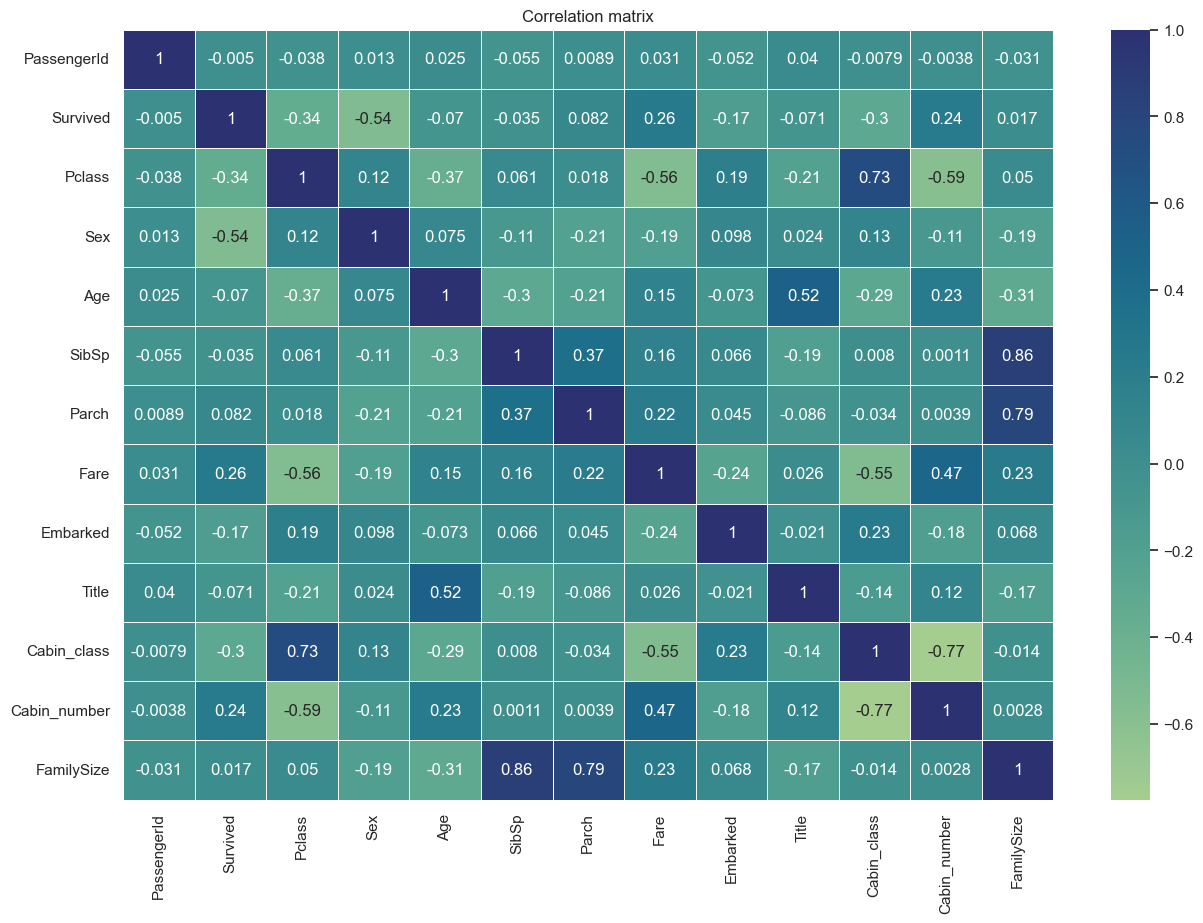

In [80]:
plt.subplots(figsize=(15, 10))
correlation_matrix = combined_df.corr()
sns.set()
sns.heatmap(correlation_matrix, cmap="crest", annot=True, linewidth=.5)
plt.title(f"Correlation matrix")
plt.show()

# Feature Correlation Analysis

From our initial correlation analysis, we find that the `Sex` feature has the highest correlation with the `Survived` label.

The `Title`, `Fare`, and `FamilySize` features have a lower correlation with the `Survived` label. However, we decide to retain these features in our dataset as we will observe later that they contribute to improving model performance.

`PassengerId` will be dropped later.



In [81]:
from scipy.stats import chi2_contingency
for column in combined_df.columns:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(combined_df[column], combined_df['Survived']))
    print(f"Chi-square test for column {column}, statistic = {chi2}, p-value = {p}")


Chi-square test for column PassengerId, statistic = 891.0, p-value = 0.484248151973633
Chi-square test for column Survived, statistic = 886.7768022383253, p-value = 7.352052198553542e-195
Chi-square test for column Pclass, statistic = 102.88898875696056, p-value = 4.549251711298793e-23
Chi-square test for column Sex, statistic = 260.71702016732104, p-value = 1.1973570627755645e-58
Chi-square test for column Age, statistic = 83.54863463686688, p-value = 0.12838061200378714
Chi-square test for column SibSp, statistic = 37.2717929152043, p-value = 1.5585810465902147e-06
Chi-square test for column Parch, statistic = 27.925784060236168, p-value = 9.703526421039997e-05
Chi-square test for column Fare, statistic = 425.8083805791106, p-value = 1.1647635739939964e-11
Chi-square test for column Embarked, statistic = 25.964452881874784, p-value = 2.3008626481449577e-06
Chi-square test for column Title, statistic = 288.11825659554046, p-value = 3.957861347159744e-61
Chi-square test for column Cabi

Age column has large p-value and can be dropped, however it does not improve accuracy of the model. Hence, it is retained.

# Modeling

In our modeling approach, we have chosen to split the dataset into two subsets, one for males and one for females. We train the models separately on these subsets, as the behavior of the two groups is distinct (females mostly survived while males mostly died). This strategy has contributed to enhancing the overall accuracy


In [82]:
train_male_df = combined_df[(combined_df['Sex'] == 1) & (combined_df['Survived'].notna())]
train_female_df = combined_df[(combined_df['Sex'] == 0) & (combined_df['Survived'].notna())]
submission_male_df = combined_df[(combined_df['Sex'] == 1) & (combined_df['Survived'].isna())]
submission_female_df = combined_df[(combined_df['Sex'] == 0) & (combined_df['Survived'].isna())]
male_passenger_ids = submission_male_df['PassengerId']
female_passenger_ids = submission_female_df['PassengerId']

train_male_df = train_male_df.drop(["Sex", 'PassengerId'], axis=1)
train_female_df = train_female_df.drop(["Sex", 'PassengerId'], axis=1)
submission_male_df = submission_male_df.drop(["Sex", 'PassengerId', 'Survived'], axis=1)
submission_female_df = submission_female_df.drop(["Sex", 'PassengerId', 'Survived'], axis=1)


# Choosing a Classifier

To find the best fitting model, we initially apply several classifier classes with their default hyperparameters. The classifiers under consideration include

- Decision Tree
- Random Forest
- Gradient Boosting
- Ada Boost
- Support Vector Classifier (SVC)
- K Neighbors
- Logistic Regression

Then, we will tune the hyperparameters of the best performing classifier separately to further enhance its performance.


In [83]:
test_data_size = 0.25

classifiers = [lambda: DecisionTreeClassifier(),
               lambda: RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0),
               lambda: GradientBoostingClassifier(learning_rate=0.05, max_depth=1, n_estimators=300, random_state=42, subsample=0.9),
               lambda: AdaBoostClassifier(),
               lambda: SVC(kernel='rbf', random_state=0),
               lambda: SVC(kernel='poly', random_state=0),
               lambda: SVC(kernel='linear', random_state=0),
               lambda: KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
               lambda: LogisticRegression(random_state=0)
               ]

classifier_scores = pd.DataFrame(columns=['Model', 'Sex', 'Test_Score', 'Train_Score'])
conf_matrix = {}

def split_df_into_train_test(df):
    y = df['Survived'].array
    x = df.drop('Survived', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_data_size, random_state=42)
    return X_test, X_train, y_test, y_train

def compare_classifiers(df, df_name):
    X_train, X_test, y_train, y_test = X_test, X_train, y_test, y_train = split_df_into_train_test(df)

    for classifier in classifiers:
        model = classifier().fit(X_train, y_train)
        y_predicted = model.predict(X_test)
        acc_score = accuracy_score(y_test, y_predicted)

        train_score = accuracy_score(y_train, model.predict(X_train))
        global classifier_scores
        classifier_scores = classifier_scores.append({'Model': str(model.__class__.__name__), 'Sex': df_name, 'Train_Score': train_score, 'Test_Score': acc_score}, ignore_index=True)
        conf_matrix[df_name] = confusion_matrix(y_test, y_predicted)


compare_classifiers(train_male_df, "male")
compare_classifiers(train_female_df, "female")

print("Best male models")
print(classifier_scores[classifier_scores["Sex"] == 'male'].sort_values(by=['Test_Score'], ascending=False))
print('-'*100)
print("Best female models")
print(classifier_scores[classifier_scores["Sex"] == 'female'].sort_values(by=['Test_Score'], ascending=False))

Best male models
                        Model   Sex  Test_Score  Train_Score
2  GradientBoostingClassifier  male    0.868966     0.865741
3          AdaBoostClassifier  male    0.862069     0.891204
6                         SVC  male    0.862069     0.849537
8          LogisticRegression  male    0.855172     0.833333
4                         SVC  male    0.848276     0.868056
7        KNeighborsClassifier  male    0.834483     0.888889
5                         SVC  male    0.820690     0.875000
1      RandomForestClassifier  male    0.806897     0.974537
0      DecisionTreeClassifier  male    0.751724     0.986111
----------------------------------------------------------------------------------------------------
Best female models
                         Model     Sex  Test_Score  Train_Score
14                         SVC  female    0.810127     0.808511
13                         SVC  female    0.797468     0.817021
15                         SVC  female    0.784810     0.8340

# Classifier Selection and Hyperparameter Tuning

Based on initial performance assessments of the various classifiers and subsequent experiments, the `SVC` classifier was selected for modeling the Female data, while the `Gradient Boost` classifier was chosen for modeling the Male data.

We use `Grid Search` with cross-validation for hyperparameter tuning of these selected models.


In [84]:
print(f"Doing a grid search for males")
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9]
}
model = GradientBoostingClassifier(random_state=42)

grid_clf = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
X_train_male, X_test_male, y_train_male, y_test_male = split_df_into_train_test(train_male_df)
grid_clf.fit(X_train_male, y_train_male)
best_params = grid_clf.best_params_

male_classifier = grid_clf.best_estimator_
y_predicted = male_classifier.predict(X_test_male)
acc_score = accuracy_score(y_test_male, y_predicted)
print(f"Male - Best parameters for grid search: {male_classifier}") 
print(f"Best params: {best_params}, test_score: {acc_score}, grid cross validation score: {grid_clf.best_score_}")

print(f"Doing a grid search for females")
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
model = SVC(kernel='rbf')

grid_clf = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
X_train_female, X_test_female, y_train_female, y_test_female = split_df_into_train_test(train_female_df)
grid_clf.fit(X_train_female, y_train_female)
best_params = grid_clf.best_params_

female_classifier = grid_clf.best_estimator_
y_predicted = female_classifier.predict(X_test_female)
acc_score = accuracy_score(y_test_female, y_predicted)
print(f"Female - Best parameters for grid search: {female_classifier}")
print(f"Best params: {best_params}, test_score: {acc_score}, grid cross validation score:{grid_clf.best_score_}")


Doing a grid search for males
Male - Best parameters for grid search: GradientBoostingClassifier(learning_rate=0.01, max_depth=1, min_samples_leaf=3,
                           n_estimators=300, random_state=42, subsample=0.7)
Best params: {'learning_rate': 0.01, 'max_depth': 1, 'min_samples_leaf': 3, 'n_estimators': 300, 'subsample': 0.7}, test_score: 0.8078703703703703, grid cross validation score: 0.8413793103448276
Doing a grid search for females
Female - Best parameters for grid search: SVC(C=10, gamma=0.01)
Best params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, test_score: 0.7829787234042553, grid cross validation score:0.8099999999999999


# Making Predictions and Combining Results

Now, with our tuned classifiers (`SVC` for Female data and `Gradient Boost` for Male data), we predict the `Survived` labels for our submission dataset. We then merge the predictions from male and female subsets to produce the final prediction set.


In [85]:
def get_submission_df(df, passenger_ids, classifier):
    predicted_survival = classifier.predict(df)
    return pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predicted_survival.astype(int)})

final_df_male = get_submission_df(submission_male_df, male_passenger_ids, male_classifier)

final_df_female = get_submission_df(submission_female_df, female_passenger_ids, female_classifier)
submission_df = pd.concat([final_df_male, final_df_female], ignore_index=True)
submission_df.sample(10)

,PassengerId,Survived
285,941,1
119,1084,0
234,1258,0
329,1060,1
386,1235,1
284,940,1
388,1239,1
181,1181,0
91,1038,0
208,1217,0


# Results and Analysis

Our competition submission ranks us within the **top 11%** of all participants. The accuracy achieved by the classifier for **females is 0.78**, while the accuracy for the **male classifier is 0.81**. 

Given that the distribution between male/female and Survived/Not survived classes is fairly balanced, accuracy serves as a suitable metric for our classification model. 

The **SVC model with {'C': 10, 'gamma': 1, 'kernel': 'rbf'}** parameters demonstrated the highest accuracy for female data, whereas the **GradientBoostingClassifier model with {'learning_rate': 0.05, 'max_depth': 1, 'min_samples_leaf': 3, 'n_estimators': 300, 'subsample': 0.7}** parameters performed best for male data.

Below, we present the confusion matrix for male and female classes:


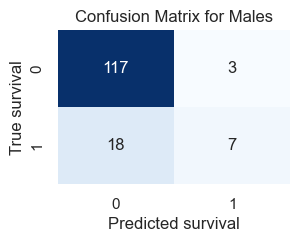

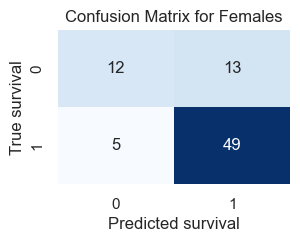

In [86]:
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix['male'], annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted survival')
plt.ylabel('True survival')
plt.title('Confusion Matrix for Males')
plt.show()

plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix['female'], annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted survival')
plt.ylabel('True survival')
plt.title('Confusion Matrix for Females')
plt.show()

# Summary and Conclusion

Our submission to the Kaggle competition landed us in 1,818th place out of 15,963 entries, which puts us in the **top  11%**. This is quite impressive for our first Kaggle competition!

Several techniques have contributed to this performance, including thorough data cleaning and analysis, careful feature engineering, and separate model training for distinct classes (male/female).

It's worth noting that we experimented with various techniques to achieve this score. Not all attempts were successful - for example, some classifiers showed excellent scores on our test dataset but underperformed on the submission dataset.

For future improvements, more feature engineering is needed. One promising feature could be family-level survival statistics. If there are multiple members of the same family in the training and submission datasets, we could leverage the survival information of family members in the training set to make predictions for those in the submission set.

